In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from nltk.stem.snowball import RussianStemmer
import stop_words

import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv("laba1_1.csv", header=[0, 1], index_col=0, encoding='utf-8')
data

вмире  \
                                                Title   
0   "Подкрутил под себя". Соседи подрались в Одесс...   
1   Путин сомневается, что США на самом деле вывед...   
2   Путин сравнил ситуацию с ценами на бензин в Ро...   
3   Рада приняла законопроект, который может лишит...   
4   Путин прокомментировал ситуацию вокруг дела об...   
5       Первый в мире веб-сайт запустили 28 лет назад   
6      Землетрясение магнитудой 5,3 произошло в Китае   
7   Путин заявил, что готов к возможной встрече с ...   
8   Колонна МЧС РФ доставила в Донбасс новогодние ...   
9   Плохая защита данных клиентов. Uber оштрафовал...   
10  Премьер-министра Албании в парламенте закидали...   
11  В Раде депутаты подрались после голосования о ...   
12  Reuters: США перестанут наносить авиаудары по ...   
13  Дед Мороз и Йоулупукки обменялись подарками на...   
14  Трамп с опечаткой посетовал на проделанную за ...   
15  Порошенко заявил, что Украина максимально укре...   
16  У гитариста Cannibal Corpse нашли арсенал оруж...   
17  Автомобиль протаранил людей на остановке в Гер...   
18  Секса больше нет. Украинцы предпочли телевизор...   
19  США и Великобритания обвинили двух граждан Кит...   
20  Додон оценил вероятность вступления Молдавии в...   
21  СМИ: Суд оставил в силе обвинения в домогатель...   
22  В аэропортах Германии объявили угрозу из-за ри...   
23  Один человек погиб и 9 ранены после наезда лег...   
24  "Бесовские силы". Депутат Рады рассказал, поче...   
25  Порошенко объявил о переброске войск к берегам...   
26  Трамп раскритиковал сенатора, высказавшегося п...   
27  "Неслыханная вещь". Песков осудил звонок Помпе...   
28  Песков: В Сирии вряд ли пожалеют о выходе из с...   
29  Помпео рассказал, как принималось решение Трам...   
30  Ошибка вышла. Amazon переслала 1700 записей чу...   
31  Самолёт рухнул на футбольное поле в США, есть ...   
32  Известного журналиста Spiegel уволили за фейко...   
33  Трамп: Глава Пентагона уйдёт в отставку в феврале   
34  В ФБР обвинили Китай в попытках сместить США с...   
35  На шахте в Чехии один человек погиб из-за взры...   
36  США будут наблюдать с Аляски за действиями Рос...   
37  СМИ: Трамп может объявить о выводе половины во...   
38  Американский рестлер оглох на одно ухо после н...   
39          В Китае отвергли обвинения США в шпионаже   
40  Работа мечты. Американка за год получила $56 т...   
41  Пушков заявил о возвращении к холодной войне и...   
42  США будут возвращать нелегальных мигрантов на ...   
43  Украинца Усика назвали лучшим боксёром года по...   
44  В Волынской области Украины запретили произвед...   
45  Учёные рассказали о росте спроса на наборы для...   
46  Во Франции за месяц беспорядков пострадало око...   
47  Из горящего отеля на севере Финляндии эвакуиро...   
48  Вышел за рамки протокола. Де Мистура попрощалс...   
49     В Канаде шторм обесточил более 300 тысяч домов   

                                                       \
                                                 Text   
0   Обвинение в адрес потерпевшего посыпались в св...   
1   Президент РФ Владимир Путин прокомментировал з...   
2   Президент Владимир Путин указал на принципиаль...   
3   Согласно документу, религиозные организации с ...   
4   В нашей стране держат на контроле ситуацию с у...   
5   Это сделал Тим Бернерс-Ли, британский учёный и...   
6   Эпицентр подземных толчков находился на глубин...   
7   Президент РФ Владимир Путин ответил на вопрос ...   
8   Грузовики привезли в том числе детские продукт...   
9   В ноябре 2017 года компания допустила утечку и...   
10  Конфликт в правительстве страны произошёл из-з...   
11  После потасовки членов двух противоборствующих...   
12  Приказ американского лидера Дональда Трампа о ...   
13  ×\n\nОбновление пользовательского соглашения\n...   
14  По словам главы Белого дома, борьбой с террори...   
15  В частности, по словам украинского лидера, уси...   
16  В коллекции музыканта среди прочих предметов б...   


In [5]:
stemmer = RussianStemmer()

In [6]:
EXCLUDE_SYMBOLS_STR = u''.join(['№', '«', 'ђ', '°', '±', '‚', 'ћ', '‰', '…', '»', 'ѓ', 'µ', '·', 'ґ', 'њ', 'ї', 'џ', 'є', '‹',
                                '‡', '†', '¶', 'ќ', '€', '“', 'ў', '§', '„', '”', '\ufeff', '’', 'љ', '›', '•', '—', '‘', 
                                '\x7f', '\xad', '¤', '\xa0'])

In [8]:
regex_punct = re.compile('[%s]' % re.escape(string.punctuation))
regex_dig = re.compile('[%s]' % re.escape(string.digits))
regex_symb = re.compile('[%s]' % re.escape(EXCLUDE_SYMBOLS_STR))
regex_struct = re.compile('[%s]' % string.printable + string.whitespace)


In [10]:
for category in data.columns.levels[0]:
    for key in data.columns.levels[1]:
        for i, item in enumerate(data[category][key]):
            item = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', u'', item)
            itme = re.sub(' +' , ' ', item)
            item = item.strip().strip('\t').replace('\n', u'')
            item = regex_punct.sub('', item)
            item = regex_dig.sub('', item)
            item = regex_symb.sub(' ', item)
            item = regex_struct.sub('', item)
            item = re.sub(' +' , ' ', item.strip())
            tokens = []
            sp = item.lower().split()
            for word in sp:
                if word not in stop_words.get_stop_words('ru'):
                    tokens.append(word)
            tmp = [stemmer.stem(word) for word in tokens]
            data.loc[i, (category, key)] = u" ".join(tmp)

In [11]:
data

вмире  \
                                                Title   
0          подкрут сосед подра одесс изз плох отоплен   
1             путин сомнева сша дел выведут войск сир   
2            путин сравн ситуац цен бензин росс франц   
3    рад приня законопроект лиш каноническ упц назван   
4   путин прокомментирова ситуац дел убийств журна...   
5                                  мир вебсайт запуст   
6                  землетрясен магнитуд произошл кита   
7                 путин заяв гот возможн встреч трамп   
8         колон мчс рф достав донбасс новогодн подарк   
9          плох защит дан клиент uber оштрафова франц   
10          премьерминистр албан парламент закида яйц   
11  рад депутат подра голосован переименован упц –...   
12       reuters сша перестанут нанос авиаудар иг сир   
13  дед мороз йоулупукк обменя подарк границ росс ...   
14      трамп опечатк посетова продела росс работ сир   
15   порошенк заяв украин максимальн укреп лин оборон   
16      гитарист canniba corps нашл арсена оруж череп   
17       автомобил протаран люд остановк герман ранен   
18  секс украинц предпочл телевизор уборк занят любов   
19  сша великобритан обвин гражда кит совершен хак...   
20  додон оцен вероятн вступлен молдав европейск союз   
21  сми суд остав сил обвинен домогательств адрес ...   
22        аэропорт герман объяв угроз изз риск теракт   
23          погиб ран наезд легковушк остановк герман   
24  бесовск сил депутат рад рассказа подра парламе...   
25  порошенк объяв переброск войск берег черн азов...   
26  трамп раскритикова сенатор высказа вывод войск...   
27  неслыха вещ песк осуд звонок помпе глав нов ук...   
28  песк сир вряд пожалеют выход стран американск ...   
29  помпе рассказа принима решен трамп вывод войск...   
30  ошибк вышл amazon пересла запис чуж разговор с...   
31              самолет рухнул футбольн пол сша жертв   
32         известн журналист spiegel увол фейков стат   
33           трамп глав пентагон уйдет отставк феврал   
34  фбр обвин кита попытк смест сша позиц ведущ св...   
35                      шахт чех погиб изз взрыв мета   
36               сша наблюда аляск действ росс арктик   
37   сми трамп объяв вывод половин воен сша афганиста   
38  американск рестлер оглох одн ух неудачн паден ...   
39                   кита отвергл обвинен сша шпионаж   
40                работ мечт американк получ обнимашк   
41  пушк заяв возвращен холодн войн изз выход сша ...   
42     сша возвраща нелегальн мигрант территор мексик   
43           украинц усик назва лучш боксер верс espn   
44  волынск област украин запрет произведен россий...   
45  учен рассказа рост спрос набор днктест рождест...   
46                франц месяц беспорядк пострада трех   
47                 горя отел север финлянд эвакуирова   
48   вышел рамк протокол де мистур попроща совбез оон   
49                            канад шторм обесточ дом   

                                                       \
                                                 Text   
0   обвинен адрес потерпевш посыпа связ хран ключ ...   
1   президент рф владимир путин прокомментирова за...   
2   президент владимир путин указа принципиальн ра...   
3   согласн документ религиозн организац руководя ...   
4   наш стран держат контрол ситуац убит российск ...   
5   сдела тим бернерсл британск учен европейск орг...   
6   эпицентр подземн толчк наход глубин километр и...   
7   президент рф владимир путин ответ вопрос журна...   
8   грузовик привезл числ детск продуктов набор ме...   
9   ноябр компан допуст утечк хакер похит дан поль...   
10  конфликт правительств стран произошел изз спор...   
11  потасовк член противоборств парт председател о...   
12  приказ американск лидер дональд трамп вывод во...   
13  ×обновлен пользовательск соглашениям повыша ка...   
14  слов глав бел дом борьб террорист должн занима...   
15  частност слов украинск лидер усил пво наращ си...   
16  коллекц музыкант сред проч предмет дробовик по...   


In [12]:
vectorizer = TfidfVectorizer()

In [13]:
x = []
Y = []

for lbl, cotegory in enumerate(data.columns.levels[0]):
    Y.extend([lbl for i in range(50)])
    x.extend(data[cotegory]["Text"])
x = np.array(x)
Y = np.array(Y)

In [14]:
X = vectorizer.fit_transform(x)
X = X.toarray()

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [16]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
cagories = data.columns.levels[0]

In [18]:
from sklearn.svm import SVC
parameters = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
svm = SVC()
svmGS = GridSearchCV(svm, parameters, scoring='precision_macro', n_jobs=-1, cv=5, verbose=10)
svmGS.fit(X_train, Y_train)

print 'Best params:'
print svmGS.best_params_
print 'Best score:'
print svmGS.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

Best params:
{u'kernel': u'linear', u'C': 0.7}
Best score:
0.5969584740785722
Wall time: 4min 13s


In [19]:
bestSVM = svmGS.best_estimator_
Y_pred_SVM = bestSVM.predict(X_test)

In [20]:
print "Test data F1-score: ", f1_score(Y_test, Y_pred_SVM, average='macro')

Test data F1-score:  0.6576923076923077


Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.28571429 0.71428571 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.625      0.125      0.         0.25      ]]


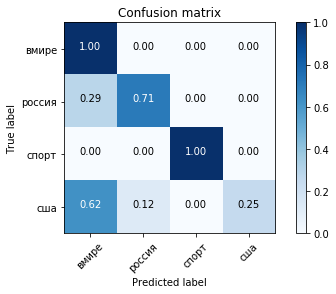

In [21]:
cmt_SVM = confusion_matrix(Y_test, Y_pred_SVM)
plot_confusion_matrix(cmt_SVM, classes=cagories, normalize=True)

In [22]:
P = precision_score(Y_test, Y_pred_SVM, average='macro')
R = recall_score(Y_test, Y_pred_SVM, average='macro')

print 'Precision: {}, Recall: {}'.format(P, R)

Precision: 0.783333333333, Recall: 0.741071428571


In [23]:
from sklearn.linear_model import LogisticRegression
parameters = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logR = LogisticRegression()
logRGS = GridSearchCV(logR, parameters, scoring='precision_macro', n_jobs=-1, cv=5, verbose=10)
logRGS.fit(X_train, Y_train)

print 'Best params:'
print logRGS.best_params_
print 'Best score:'
print logRGS.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

Best params:
{u'C': 0.7, u'solver': u'newton-cg'}
Best score:
0.6243393799827623


In [24]:
bestLogR = logRGS.best_estimator_
Y_pred_logR = bestLogR.predict(X_test)

In [25]:
print "Test data F1-score: ", f1_score(Y_test, Y_pred_logR, average='macro')

Test data F1-score:  0.5863636363636363


Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.57142857 0.42857143 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.625      0.125      0.         0.25      ]]


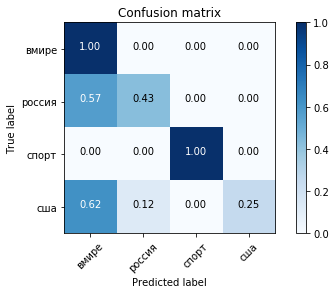

In [26]:
cmt_logR = confusion_matrix(Y_test, Y_pred_logR)
plot_confusion_matrix(cmt_logR, classes=cagories, normalize=True)

In [27]:
P = precision_score(Y_test, Y_pred_logR, average='macro')
R = recall_score(Y_test, Y_pred_logR, average='macro')

print 'Precision: {}, Recall: {}'.format(P, R)

Precision: 0.75, Recall: 0.669642857143
